<a href="https://colab.research.google.com/github/semesarker/A-Text-Independent-Speech-Emotion-Recognition-Based-on-Convolution-Neural-Network/blob/main/CNN2D%2BGRU_Model_using_MFCC_%26_Melspectrogram_features_on_Ravdess_%26_TESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip
   creating: rav/
   creating: rav/Actor_01/
  inflating: rav/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-02-01.wav  
  infl

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/TESS.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/TESS.zip
   creating: TESS/
   creating: TESS/OAF_angry/
  inflating: TESS/OAF_angry/OAF_back_angry.wav  
  inflating: TESS/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS/OAF_angry/OAF_base_angry.wav  
  inflating: TESS/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS/OAF_angry/OAF_book_angry.wav  
  inflating: TESS/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS/OAF_angry/OAF_cab_angry.wav  
  inflating: TESS/OAF_angry/OAF_calm_angry.wav  
  inflating: TESS/OAF_angry/OAF_came_angry.wav  
  inflating: TESS/OAF_angry/OAF_cause_angry.wav  
  inflating: TESS/OAF_angry/OAF_chain_angry.wav  
  inflating: TES

In [ ]:
# Keras
#import tensorflow as tf
from IPython.display import Audio
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
Ravdess = "/content/rav"
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list

['Actor_19',
 'Actor_24',
 'Actor_11',
 'Actor_23',
 'Actor_22',
 'Actor_16',
 'Actor_03',
 'Actor_17',
 'Actor_06',
 'Actor_12',
 'Actor_20',
 'Actor_04',
 'Actor_15',
 'Actor_01',
 'Actor_10',
 'Actor_14',
 'Actor_21',
 'Actor_08',
 'Actor_02',
 'Actor_07',
 'Actor_05',
 'Actor_18',
 'Actor_13',
 'Actor_09']

In [ ]:
# Ravdess preprocess
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for directory in ravdess_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(Ravdess + '/' + directory)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + directory + '/' + file)

In [ ]:
file_path

['/content/rav/Actor_19/03-01-06-01-02-02-19.wav',
 '/content/rav/Actor_19/03-01-01-01-01-01-19.wav',
 '/content/rav/Actor_19/03-01-03-01-01-01-19.wav',
 '/content/rav/Actor_19/03-01-04-01-02-02-19.wav',
 '/content/rav/Actor_19/03-01-04-01-01-02-19.wav',
 '/content/rav/Actor_19/03-01-08-01-02-01-19.wav',
 '/content/rav/Actor_19/03-01-04-01-02-01-19.wav',
 '/content/rav/Actor_19/03-01-08-02-02-01-19.wav',
 '/content/rav/Actor_19/03-01-03-02-02-01-19.wav',
 '/content/rav/Actor_19/03-01-06-01-01-01-19.wav',
 '/content/rav/Actor_19/03-01-05-02-02-01-19.wav',
 '/content/rav/Actor_19/03-01-05-01-01-01-19.wav',
 '/content/rav/Actor_19/03-01-02-02-02-01-19.wav',
 '/content/rav/Actor_19/03-01-07-02-01-01-19.wav',
 '/content/rav/Actor_19/03-01-02-01-02-02-19.wav',
 '/content/rav/Actor_19/03-01-02-01-01-02-19.wav',
 '/content/rav/Actor_19/03-01-03-02-02-02-19.wav',
 '/content/rav/Actor_19/03-01-06-01-01-02-19.wav',
 '/content/rav/Actor_19/03-01-06-02-02-02-19.wav',
 '/content/rav/Actor_19/03-01-0

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,fear,/content/rav/Actor_19/03-01-06-01-02-02-19.wav
1,neutral,/content/rav/Actor_19/03-01-01-01-01-01-19.wav
2,happy,/content/rav/Actor_19/03-01-03-01-01-01-19.wav
3,sad,/content/rav/Actor_19/03-01-04-01-02-02-19.wav
4,sad,/content/rav/Actor_19/03-01-04-01-01-02-19.wav


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:

Tess='/content/TESS'
tess_directory_list = os.listdir(Tess)
tess_directory_list

['OAF_neutral',
 'YAF_disgust',
 'OAF_Sad',
 'YAF_happy',
 'OAF_happy',
 'OAF_disgust',
 'YAF_sad',
 'YAF_angry',
 'OAF_angry',
 'OAF_Fear',
 'YAF_neutral',
 'OAF_Pleasant_surprise',
 'YAF_pleasant_surprised',
 'YAF_fear']

In [ ]:
# TESS preprocess
# increase the data available for surprise emotion
tess_directory_list = os.listdir(Tess)
file_path = []
file_emotion = []
for dir in tess_directory_list:
    directories = os.listdir(Tess +'/'+  dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/' + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,neutral,/content/TESS/OAF_neutral/OAF_vote_neutral.wav
1,neutral,/content/TESS/OAF_neutral/OAF_met_neutral.wav
2,neutral,/content/TESS/OAF_neutral/OAF_date_neutral.wav
3,neutral,/content/TESS/OAF_neutral/OAF_said_neutral.wav
4,neutral,/content/TESS/OAF_neutral/OAF_half_neutral.wav


In [ ]:
Tess_df.shape

(2800, 2)

In [ ]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path

,Emotions,Path
0,fear,/content/rav/Actor_19/03-01-06-01-02-02-19.wav
1,neutral,/content/rav/Actor_19/03-01-01-01-01-01-19.wav
2,happy,/content/rav/Actor_19/03-01-03-01-01-01-19.wav
3,sad,/content/rav/Actor_19/03-01-04-01-02-02-19.wav
4,sad,/content/rav/Actor_19/03-01-04-01-01-02-19.wav
...,...,...
2795,fear,/content/TESS/YAF_fear/YAF_cause_fear.wav
2796,fear,/content/TESS/YAF_fear/YAF_sure_fear.wav
2797,fear,/content/TESS/YAF_fear/YAF_hash_fear.wav
2798,fear,/content/TESS/YAF_fear/YAF_mouse_fear.wav


In [ ]:
index = list(np.arange(start=0, stop=4240, step=1))
data_path.index = index

In [ ]:
data_path.reset_index()

,index,Emotions,Path
0,0,fear,/content/rav/Actor_19/03-01-06-01-02-02-19.wav
1,1,neutral,/content/rav/Actor_19/03-01-01-01-01-01-19.wav
2,2,happy,/content/rav/Actor_19/03-01-03-01-01-01-19.wav
3,3,sad,/content/rav/Actor_19/03-01-04-01-02-02-19.wav
4,4,sad,/content/rav/Actor_19/03-01-04-01-01-02-19.wav
...,...,...,...
4235,4235,fear,/content/TESS/YAF_fear/YAF_cause_fear.wav
4236,4236,fear,/content/TESS/YAF_fear/YAF_sure_fear.wav
4237,4237,fear,/content/TESS/YAF_fear/YAF_hash_fear.wav
4238,4238,fear,/content/TESS/YAF_fear/YAF_mouse_fear.wav


In [ ]:
data_path.drop(['index'],axis=1)

KeyError: ignored

In [ ]:
data_path

In [ ]:
data_path.Emotions.value_counts()

fear        592
happy       592
sad         592
surprise    592
angry       592
disgust     592
neutral     496
calm        192
Name: Emotions, dtype: int64

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=2.5
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,158,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=1)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel=prepare_data(data_path,n=30,mfcc=1,mel=1)

  0%|          | 3/4240 [00:01<31:12,  2.26it/s]  

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 5/4240 [00:01<17:58,  3.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 7/4240 [00:01<12:51,  5.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 11/4240 [00:02<08:51,  7.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 13/4240 [00:02<08:58,  7.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 15/4240 [00:02<08:31,  8.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 17/4240 [00:02<08:01,  8.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 21/4240 [00:03<07:13,  9.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 23/4240 [00:03<07:02,  9.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 27/4240 [00:03<06:56, 10.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 29/4240 [00:04<07:21,  9.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 31/4240 [00:04<07:55,  8.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 33/4240 [00:04<08:43,  8.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 36/4240 [00:04<06:45, 10.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 38/4240 [00:05<06:38, 10.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 42/4240 [00:05<07:00,  9.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 44/4240 [00:05<07:36,  9.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 47/4240 [00:06<07:41,  9.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 49/4240 [00:06<07:39,  9.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 50/4240 [00:06<07:39,  9.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 53/4240 [00:06<07:39,  9.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 55/4240 [00:07<07:56,  8.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 56/4240 [00:07<09:01,  7.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 59/4240 [00:07<08:41,  8.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 60/4240 [00:07<10:05,  6.90it/s]

mfcc_logspec (30, 158, 1)


  1%|▏         | 61/4240 [00:08<13:28,  5.17it/s]

mfcc_logspec (30, 158, 1)


  1%|▏         | 62/4240 [00:08<16:10,  4.30it/s]

mfcc_logspec (30, 158, 1)


  1%|▏         | 63/4240 [00:08<19:01,  3.66it/s]

mfcc_logspec (30, 158, 1)


  2%|▏         | 65/4240 [00:09<17:59,  3.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 67/4240 [00:09<13:24,  5.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 69/4240 [00:09<10:55,  6.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 71/4240 [00:10<09:22,  7.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 73/4240 [00:10<08:46,  7.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 75/4240 [00:10<08:40,  8.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 77/4240 [00:10<08:23,  8.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 79/4240 [00:11<08:29,  8.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 83/4240 [00:11<05:46, 12.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 87/4240 [00:11<04:46, 14.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 91/4240 [00:11<04:35, 15.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 95/4240 [00:12<04:28, 15.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 99/4240 [00:12<04:21, 15.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 103/4240 [00:12<04:10, 16.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 107/4240 [00:12<04:12, 16.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 111/4240 [00:13<04:15, 16.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 115/4240 [00:13<04:11, 16.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 119/4240 [00:13<04:17, 15.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 123/4240 [00:13<04:11, 16.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 127/4240 [00:14<04:20, 15.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 131/4240 [00:14<04:21, 15.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 135/4240 [00:14<04:12, 16.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 139/4240 [00:14<04:14, 16.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 143/4240 [00:15<04:21, 15.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 147/4240 [00:15<04:15, 16.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▎         | 151/4240 [00:15<04:08, 16.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▎         | 155/4240 [00:15<04:05, 16.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 159/4240 [00:16<04:12, 16.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 163/4240 [00:16<04:04, 16.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 167/4240 [00:16<04:06, 16.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 171/4240 [00:16<04:06, 16.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 175/4240 [00:17<04:10, 16.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 179/4240 [00:17<04:18, 15.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 183/4240 [00:17<04:10, 16.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 187/4240 [00:17<04:06, 16.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 191/4240 [00:17<04:04, 16.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 195/4240 [00:18<04:10, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 199/4240 [00:18<04:04, 16.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 203/4240 [00:18<04:04, 16.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 207/4240 [00:18<04:04, 16.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 211/4240 [00:19<04:05, 16.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 215/4240 [00:19<04:06, 16.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 219/4240 [00:19<04:02, 16.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 223/4240 [00:19<04:05, 16.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 227/4240 [00:20<04:11, 15.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 231/4240 [00:20<04:06, 16.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 235/4240 [00:20<04:03, 16.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 239/4240 [00:20<04:01, 16.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 241/4240 [00:21<04:02, 16.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 245/4240 [00:21<04:32, 14.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 247/4240 [00:21<04:34, 14.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 249/4240 [00:21<05:09, 12.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 251/4240 [00:21<06:01, 11.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 253/4240 [00:22<06:35, 10.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 255/4240 [00:22<06:59,  9.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 258/4240 [00:22<07:15,  9.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 260/4240 [00:22<07:24,  8.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 263/4240 [00:23<06:33, 10.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 265/4240 [00:23<06:08, 10.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 267/4240 [00:23<06:45,  9.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 270/4240 [00:23<06:11, 10.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 272/4240 [00:24<06:38,  9.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 274/4240 [00:24<06:58,  9.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 276/4240 [00:24<07:19,  9.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 278/4240 [00:24<07:30,  8.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 280/4240 [00:25<07:52,  8.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 282/4240 [00:25<08:13,  8.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 286/4240 [00:25<05:37, 11.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 290/4240 [00:25<04:48, 13.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 294/4240 [00:26<04:21, 15.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 298/4240 [00:26<04:14, 15.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 302/4240 [00:26<04:10, 15.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 306/4240 [00:26<04:02, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 310/4240 [00:27<04:04, 16.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 314/4240 [00:27<04:10, 15.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 316/4240 [00:27<04:29, 14.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 318/4240 [00:27<05:40, 11.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 320/4240 [00:28<06:39,  9.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 322/4240 [00:28<06:55,  9.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 326/4240 [00:28<05:32, 11.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 330/4240 [00:28<04:41, 13.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 334/4240 [00:29<04:21, 14.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 338/4240 [00:29<04:18, 15.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 342/4240 [00:29<04:18, 15.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 346/4240 [00:29<04:09, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 350/4240 [00:30<04:12, 15.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 354/4240 [00:30<04:05, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 358/4240 [00:30<04:02, 15.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▊         | 362/4240 [00:30<04:05, 15.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▊         | 366/4240 [00:31<04:03, 15.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▊         | 370/4240 [00:31<04:04, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 374/4240 [00:31<04:06, 15.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 378/4240 [00:31<04:06, 15.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 382/4240 [00:32<04:06, 15.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 386/4240 [00:32<04:12, 15.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 390/4240 [00:32<04:14, 15.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 394/4240 [00:32<04:14, 15.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 398/4240 [00:33<04:12, 15.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 402/4240 [00:33<04:04, 15.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 406/4240 [00:33<04:15, 15.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 410/4240 [00:34<04:14, 15.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 414/4240 [00:34<04:08, 15.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 418/4240 [00:34<04:07, 15.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 422/4240 [00:34<04:05, 15.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 426/4240 [00:35<04:06, 15.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 430/4240 [00:35<04:04, 15.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 432/4240 [00:35<04:03, 15.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 434/4240 [00:35<04:16, 14.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 438/4240 [00:35<05:08, 12.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 440/4240 [00:36<05:17, 11.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 442/4240 [00:36<05:59, 10.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 444/4240 [00:36<06:13, 10.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 447/4240 [00:36<07:01,  8.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 450/4240 [00:37<06:45,  9.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 452/4240 [00:37<07:15,  8.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 454/4240 [00:37<06:21,  9.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 457/4240 [00:38<06:51,  9.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 460/4240 [00:38<06:17, 10.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 462/4240 [00:38<07:02,  8.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 464/4240 [00:38<06:49,  9.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 467/4240 [00:39<06:37,  9.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 469/4240 [00:39<06:56,  9.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 471/4240 [00:39<07:11,  8.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 473/4240 [00:39<07:12,  8.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 477/4240 [00:40<05:16, 11.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 481/4240 [00:40<04:34, 13.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 485/4240 [00:40<04:09, 15.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 487/4240 [00:40<04:24, 14.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 491/4240 [00:41<04:07, 15.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 495/4240 [00:41<04:03, 15.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 499/4240 [00:41<03:55, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 503/4240 [00:41<03:52, 16.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 507/4240 [00:42<03:59, 15.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 511/4240 [00:42<03:57, 15.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 515/4240 [00:42<03:55, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 519/4240 [00:42<03:58, 15.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 523/4240 [00:43<03:57, 15.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 527/4240 [00:43<03:54, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 531/4240 [00:43<03:50, 16.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 535/4240 [00:43<03:45, 16.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 539/4240 [00:44<03:47, 16.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 543/4240 [00:44<03:44, 16.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 547/4240 [00:44<03:43, 16.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 551/4240 [00:44<03:48, 16.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 553/4240 [00:44<03:57, 15.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 557/4240 [00:45<03:57, 15.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 561/4240 [00:45<03:57, 15.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 565/4240 [00:45<03:56, 15.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 569/4240 [00:45<04:00, 15.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▎        | 573/4240 [00:46<03:58, 15.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▎        | 577/4240 [00:46<03:50, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▎        | 581/4240 [00:46<03:46, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 585/4240 [00:46<03:53, 15.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 589/4240 [00:47<03:53, 15.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 593/4240 [00:47<03:57, 15.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 597/4240 [00:47<03:52, 15.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 601/4240 [00:48<03:57, 15.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 605/4240 [00:48<03:57, 15.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 609/4240 [00:48<03:52, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 613/4240 [00:48<03:49, 15.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 615/4240 [00:48<03:56, 15.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 619/4240 [00:49<03:58, 15.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 623/4240 [00:49<03:57, 15.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 627/4240 [00:49<03:56, 15.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 631/4240 [00:50<04:09, 14.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 633/4240 [00:50<04:21, 13.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 635/4240 [00:50<04:28, 13.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 637/4240 [00:50<05:24, 11.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 639/4240 [00:50<05:58, 10.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 642/4240 [00:51<06:32,  9.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 644/4240 [00:51<06:49,  8.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 646/4240 [00:51<06:56,  8.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 648/4240 [00:51<06:57,  8.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 650/4240 [00:52<07:20,  8.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 652/4240 [00:52<07:27,  8.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 654/4240 [00:52<07:32,  7.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 656/4240 [00:52<07:22,  8.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 658/4240 [00:53<07:19,  8.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 660/4240 [00:53<06:56,  8.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 662/4240 [00:53<06:58,  8.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 664/4240 [00:53<07:07,  8.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 666/4240 [00:54<07:23,  8.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 16%|█▌        | 670/4240 [00:54<05:09, 11.53it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 674/4240 [00:54<04:17, 13.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 678/4240 [00:54<04:00, 14.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 682/4240 [00:55<03:50, 15.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 686/4240 [00:55<03:50, 15.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 690/4240 [00:55<03:47, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 694/4240 [00:55<03:45, 15.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 698/4240 [00:56<03:39, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 702/4240 [00:56<03:42, 15.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 706/4240 [00:56<03:39, 16.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 710/4240 [00:56<03:40, 16.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 714/4240 [00:57<03:40, 15.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 716/4240 [00:57<03:53, 15.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 720/4240 [00:57<03:47, 15.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 724/4240 [00:57<03:42, 15.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 728/4240 [00:58<03:37, 16.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 732/4240 [00:58<03:40, 15.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 736/4240 [00:58<03:43, 15.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 740/4240 [00:58<03:41, 15.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 744/4240 [00:59<03:36, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 748/4240 [00:59<03:38, 15.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 752/4240 [00:59<03:35, 16.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 756/4240 [00:59<03:33, 16.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 760/4240 [01:00<03:37, 16.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 764/4240 [01:00<03:40, 15.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 768/4240 [01:00<03:43, 15.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 772/4240 [01:00<03:40, 15.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 776/4240 [01:01<03:35, 16.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 780/4240 [01:01<03:45, 15.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 782/4240 [01:01<05:31, 10.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 784/4240 [01:01<06:00,  9.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 788/4240 [01:02<04:44, 12.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 790/4240 [01:02<04:19, 13.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 792/4240 [01:02<05:23, 10.65it/s]

mfcc_logspec (30, 158, 1)


 19%|█▊        | 794/4240 [01:02<06:49,  8.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 798/4240 [01:03<05:12, 11.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 802/4240 [01:03<04:30, 12.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 804/4240 [01:03<06:18,  9.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 806/4240 [01:04<06:15,  9.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 810/4240 [01:04<05:08, 11.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 812/4240 [01:04<05:07, 11.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 814/4240 [01:04<05:37, 10.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 816/4240 [01:05<06:08,  9.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 820/4240 [01:05<05:48,  9.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 822/4240 [01:05<05:27, 10.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 824/4240 [01:05<05:33, 10.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 827/4240 [01:06<06:06,  9.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 829/4240 [01:06<06:31,  8.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 831/4240 [01:06<06:51,  8.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 833/4240 [01:06<06:50,  8.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 835/4240 [01:07<07:01,  8.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 837/4240 [01:07<06:15,  9.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 840/4240 [01:07<06:01,  9.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 842/4240 [01:07<06:36,  8.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 844/4240 [01:08<06:32,  8.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 846/4240 [01:08<06:47,  8.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 848/4240 [01:08<06:58,  8.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 20%|██        | 852/4240 [01:08<04:43, 11.94it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 856/4240 [01:09<04:08, 13.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 860/4240 [01:09<03:43, 15.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 864/4240 [01:09<03:36, 15.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 868/4240 [01:09<03:31, 15.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 872/4240 [01:10<03:30, 16.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 876/4240 [01:10<03:33, 15.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 880/4240 [01:10<03:30, 15.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 884/4240 [01:10<03:29, 16.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 888/4240 [01:11<03:23, 16.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 892/4240 [01:11<03:22, 16.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 896/4240 [01:11<03:22, 16.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 900/4240 [01:11<03:23, 16.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██▏       | 904/4240 [01:12<03:22, 16.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██▏       | 908/4240 [01:12<03:21, 16.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 912/4240 [01:12<03:18, 16.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 916/4240 [01:12<03:22, 16.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 920/4240 [01:13<03:27, 16.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 924/4240 [01:13<03:23, 16.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 928/4240 [01:13<03:25, 16.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 932/4240 [01:13<03:25, 16.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 936/4240 [01:14<03:27, 15.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 940/4240 [01:14<03:24, 16.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 944/4240 [01:14<03:20, 16.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 948/4240 [01:14<03:25, 16.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 952/4240 [01:15<03:25, 15.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 956/4240 [01:15<03:28, 15.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 960/4240 [01:15<03:23, 16.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 964/4240 [01:15<03:22, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 968/4240 [01:16<03:18, 16.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 972/4240 [01:16<03:16, 16.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 976/4240 [01:16<03:21, 16.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 980/4240 [01:16<03:27, 15.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 984/4240 [01:17<03:22, 16.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 988/4240 [01:17<03:17, 16.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 992/4240 [01:17<03:16, 16.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 994/4240 [01:17<03:18, 16.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 998/4240 [01:17<03:25, 15.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 1002/4240 [01:18<03:22, 15.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 1006/4240 [01:18<03:24, 15.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1010/4240 [01:18<03:42, 14.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1012/4240 [01:18<04:28, 12.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1014/4240 [01:19<04:21, 12.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1016/4240 [01:19<05:02, 10.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1020/4240 [01:19<05:23,  9.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1022/4240 [01:19<05:06, 10.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1024/4240 [01:20<05:22,  9.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1028/4240 [01:20<04:52, 10.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1030/4240 [01:20<05:07, 10.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1032/4240 [01:21<05:42,  9.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1034/4240 [01:21<06:05,  8.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1036/4240 [01:21<06:18,  8.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1038/4240 [01:21<06:22,  8.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1042/4240 [01:22<04:44, 11.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1044/4240 [01:22<04:56, 10.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1046/4240 [01:22<05:05, 10.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1049/4240 [01:22<05:54,  9.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1051/4240 [01:23<05:41,  9.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1053/4240 [01:23<05:52,  9.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1056/4240 [01:23<05:04, 10.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1060/4240 [01:23<04:03, 13.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1064/4240 [01:24<03:54, 13.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1068/4240 [01:24<03:39, 14.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1072/4240 [01:24<03:34, 14.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1076/4240 [01:24<03:30, 15.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1080/4240 [01:25<03:28, 15.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1084/4240 [01:25<03:24, 15.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1088/4240 [01:25<03:17, 15.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1092/4240 [01:25<03:17, 15.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1096/4240 [01:26<03:22, 15.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1100/4240 [01:26<03:20, 15.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1104/4240 [01:26<03:15, 16.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1108/4240 [01:26<03:11, 16.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1112/4240 [01:27<03:15, 16.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1116/4240 [01:27<03:17, 15.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1120/4240 [01:27<03:15, 16.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1124/4240 [01:27<03:12, 16.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1128/4240 [01:28<03:16, 15.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1132/4240 [01:28<03:12, 16.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1136/4240 [01:28<03:13, 16.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1140/4240 [01:28<03:09, 16.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1144/4240 [01:29<03:13, 16.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1148/4240 [01:29<03:14, 15.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1152/4240 [01:29<03:14, 15.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1156/4240 [01:29<03:10, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1160/4240 [01:30<03:09, 16.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1164/4240 [01:30<03:12, 15.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1168/4240 [01:30<03:17, 15.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1172/4240 [01:30<03:15, 15.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1176/4240 [01:31<03:17, 15.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1180/4240 [01:31<03:20, 15.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1184/4240 [01:31<03:16, 15.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1188/4240 [01:31<03:18, 15.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1190/4240 [01:32<03:17, 15.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1194/4240 [01:32<03:24, 14.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1198/4240 [01:32<03:22, 15.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1202/4240 [01:32<03:21, 15.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1206/4240 [01:33<03:23, 14.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1210/4240 [01:33<03:26, 14.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1212/4240 [01:33<03:34, 14.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1214/4240 [01:33<04:05, 12.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1216/4240 [01:34<04:46, 10.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1218/4240 [01:34<05:13,  9.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1221/4240 [01:34<05:49,  8.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1223/4240 [01:34<06:03,  8.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1225/4240 [01:35<06:08,  8.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1226/4240 [01:35<06:12,  8.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1229/4240 [01:35<05:58,  8.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1231/4240 [01:35<05:53,  8.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1233/4240 [01:36<05:53,  8.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1235/4240 [01:36<05:51,  8.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1238/4240 [01:36<05:36,  8.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1240/4240 [01:36<06:06,  8.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1242/4240 [01:37<06:05,  8.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1244/4240 [01:37<06:11,  8.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1247/4240 [01:37<05:22,  9.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1249/4240 [01:38<05:41,  8.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1252/4240 [01:38<04:24, 11.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1256/4240 [01:38<03:43, 13.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1260/4240 [01:38<03:27, 14.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1264/4240 [01:39<03:21, 14.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1268/4240 [01:39<03:19, 14.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1272/4240 [01:39<03:17, 15.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1276/4240 [01:39<03:11, 15.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1280/4240 [01:40<03:06, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1282/4240 [01:40<03:10, 15.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1288/4240 [01:40<03:12, 15.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1292/4240 [01:40<03:05, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1296/4240 [01:41<03:09, 15.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1300/4240 [01:41<03:11, 15.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1304/4240 [01:41<03:11, 15.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1308/4240 [01:41<03:08, 15.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1312/4240 [01:42<03:03, 15.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1316/4240 [01:42<03:08, 15.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1320/4240 [01:42<03:09, 15.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1324/4240 [01:42<03:09, 15.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1328/4240 [01:43<03:10, 15.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1332/4240 [01:43<03:07, 15.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1336/4240 [01:43<03:08, 15.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1340/4240 [01:43<03:02, 15.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1344/4240 [01:44<03:05, 15.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1348/4240 [01:44<03:02, 15.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1352/4240 [01:44<03:09, 15.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1356/4240 [01:44<03:00, 15.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1360/4240 [01:45<02:57, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1364/4240 [01:45<03:01, 15.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1368/4240 [01:45<03:08, 15.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1372/4240 [01:46<03:09, 15.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1376/4240 [01:46<03:00, 15.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1380/4240 [01:46<03:01, 15.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1384/4240 [01:46<03:00, 15.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1388/4240 [01:47<03:06, 15.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1392/4240 [01:47<03:06, 15.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1396/4240 [01:47<03:02, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1398/4240 [01:47<03:08, 15.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1402/4240 [01:47<03:18, 14.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1404/4240 [01:48<03:51, 12.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1406/4240 [01:48<04:30, 10.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1408/4240 [01:48<05:03,  9.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1410/4240 [01:49<05:27,  8.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1412/4240 [01:49<05:47,  8.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1414/4240 [01:49<06:03,  7.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1416/4240 [01:49<05:38,  8.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1418/4240 [01:50<05:41,  8.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1419/4240 [01:50<08:31,  5.52it/s]

mfcc_logspec (30, 158, 1)


 33%|███▎      | 1420/4240 [01:50<10:42,  4.39it/s]

mfcc_logspec (30, 158, 1)


 34%|███▎      | 1421/4240 [01:51<11:26,  4.11it/s]

mfcc_logspec (30, 158, 1)


 34%|███▎      | 1422/4240 [01:51<12:25,  3.78it/s]

mfcc_logspec (30, 158, 1)


 34%|███▎      | 1424/4240 [01:51<11:14,  4.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1427/4240 [01:52<06:43,  6.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1429/4240 [01:52<05:32,  8.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1432/4240 [01:52<05:35,  8.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1435/4240 [01:52<04:57,  9.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1439/4240 [01:53<03:54, 11.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1444/4240 [01:53<02:42, 17.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1450/4240 [01:53<02:05, 22.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1456/4240 [01:53<01:53, 24.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1462/4240 [01:54<01:47, 25.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1468/4240 [01:54<01:42, 26.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1474/4240 [01:54<01:44, 26.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1480/4240 [01:54<01:40, 27.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1486/4240 [01:54<01:40, 27.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1493/4240 [01:55<01:35, 28.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1501/4240 [01:55<01:31, 29.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1507/4240 [01:55<01:36, 28.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1510/4240 [01:55<01:38, 27.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1517/4240 [01:55<01:40, 26.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1524/4240 [01:56<01:37, 27.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1530/4240 [01:56<01:40, 26.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1536/4240 [01:56<01:41, 26.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▋      | 1542/4240 [01:56<01:40, 26.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1549/4240 [01:57<01:36, 27.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1553/4240 [01:57<01:32, 28.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1560/4240 [01:57<01:31, 29.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1567/4240 [01:57<01:30, 29.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1573/4240 [01:57<01:32, 28.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1580/4240 [01:58<01:34, 28.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1588/4240 [01:58<01:29, 29.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1595/4240 [01:58<01:27, 30.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1603/4240 [01:58<01:25, 30.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1607/4240 [01:59<01:27, 29.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1614/4240 [01:59<01:33, 28.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1620/4240 [01:59<01:37, 26.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1626/4240 [01:59<01:36, 27.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▊      | 1633/4240 [02:00<01:33, 27.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▊      | 1639/4240 [02:00<01:36, 26.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1645/4240 [02:00<01:36, 26.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1651/4240 [02:00<01:37, 26.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1657/4240 [02:01<01:38, 26.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1660/4240 [02:01<01:45, 24.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 39%|███▉      | 1666/4240 [02:01<01:41, 25.37it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1672/4240 [02:01<01:40, 25.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1678/4240 [02:01<01:38, 26.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 40%|███▉      | 1684/4240 [02:02<01:38, 25.99it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1690/4240 [02:02<01:44, 24.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1696/4240 [02:02<01:43, 24.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1699/4240 [02:02<01:47, 23.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1705/4240 [02:03<02:01, 20.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1708/4240 [02:03<02:24, 17.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1710/4240 [02:03<02:35, 16.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1715/4240 [02:03<02:39, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1717/4240 [02:03<02:46, 15.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1721/4240 [02:04<02:58, 14.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1723/4240 [02:04<03:03, 13.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1727/4240 [02:04<03:09, 13.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1729/4240 [02:04<03:09, 13.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1733/4240 [02:05<02:59, 13.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1737/4240 [02:05<02:45, 15.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1741/4240 [02:05<02:51, 14.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1743/4240 [02:05<03:00, 13.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1747/4240 [02:06<03:14, 12.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████▏     | 1749/4240 [02:06<03:21, 12.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████▏     | 1753/4240 [02:06<03:04, 13.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████▏     | 1757/4240 [02:06<02:58, 13.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████▏     | 1759/4240 [02:07<02:55, 14.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1763/4240 [02:07<02:51, 14.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1767/4240 [02:07<02:46, 14.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1773/4240 [02:07<02:10, 18.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1776/4240 [02:07<02:02, 20.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1782/4240 [02:08<01:52, 21.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1788/4240 [02:08<01:51, 22.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1794/4240 [02:08<01:44, 23.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1800/4240 [02:08<01:39, 24.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1806/4240 [02:09<01:40, 24.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1809/4240 [02:09<01:43, 23.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1815/4240 [02:09<01:45, 23.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1821/4240 [02:09<01:38, 24.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1827/4240 [02:10<01:35, 25.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1833/4240 [02:10<01:36, 24.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1836/4240 [02:10<01:44, 23.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1842/4240 [02:10<01:36, 24.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▎     | 1848/4240 [02:10<01:35, 25.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▎     | 1854/4240 [02:11<01:32, 25.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1860/4240 [02:11<01:34, 25.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1866/4240 [02:11<01:37, 24.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1872/4240 [02:11<01:31, 25.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1878/4240 [02:12<01:31, 25.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1884/4240 [02:12<01:31, 25.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1887/4240 [02:12<01:35, 24.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1893/4240 [02:12<01:36, 24.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1899/4240 [02:12<01:33, 24.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1905/4240 [02:13<01:35, 24.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1911/4240 [02:13<01:33, 24.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1914/4240 [02:13<01:39, 23.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 45%|████▌     | 1920/4240 [02:13<01:37, 23.90it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1926/4240 [02:14<01:33, 24.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1932/4240 [02:14<01:29, 25.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1938/4240 [02:14<01:34, 24.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1944/4240 [02:14<01:33, 24.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1950/4240 [02:15<01:33, 24.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1956/4240 [02:15<01:34, 24.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▋     | 1962/4240 [02:15<01:33, 24.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▋     | 1968/4240 [02:15<01:31, 24.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1974/4240 [02:16<01:30, 25.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1977/4240 [02:16<01:30, 24.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1983/4240 [02:16<01:30, 24.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1989/4240 [02:16<01:35, 23.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1995/4240 [02:16<01:32, 24.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2001/4240 [02:17<01:32, 24.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2004/4240 [02:17<01:33, 23.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2010/4240 [02:17<01:35, 23.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2013/4240 [02:17<01:56, 19.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2018/4240 [02:18<02:11, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2022/4240 [02:18<02:27, 15.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2026/4240 [02:18<02:29, 14.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2030/4240 [02:18<02:30, 14.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2032/4240 [02:19<02:32, 14.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2036/4240 [02:19<02:24, 15.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2038/4240 [02:19<02:52, 12.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2042/4240 [02:19<02:51, 12.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2044/4240 [02:20<02:46, 13.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2048/4240 [02:20<02:29, 14.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2052/4240 [02:20<02:29, 14.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2054/4240 [02:20<02:30, 14.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▊     | 2058/4240 [02:20<02:33, 14.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▊     | 2062/4240 [02:21<02:26, 14.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▊     | 2066/4240 [02:21<02:18, 15.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2070/4240 [02:21<02:17, 15.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2074/4240 [02:21<02:13, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2078/4240 [02:22<02:16, 15.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2082/4240 [02:22<02:23, 15.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2087/4240 [02:22<01:54, 18.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2093/4240 [02:22<01:34, 22.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2100/4240 [02:23<01:18, 27.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2103/4240 [02:23<01:24, 25.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2109/4240 [02:23<01:30, 23.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2116/4240 [02:23<01:26, 24.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2122/4240 [02:24<01:27, 24.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2128/4240 [02:24<01:21, 25.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2134/4240 [02:24<01:24, 24.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2138/4240 [02:24<01:20, 26.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2144/4240 [02:25<01:28, 23.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2150/4240 [02:25<01:25, 24.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2156/4240 [02:25<01:20, 26.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2163/4240 [02:25<01:10, 29.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2169/4240 [02:25<01:15, 27.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████▏    | 2175/4240 [02:26<01:24, 24.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████▏    | 2181/4240 [02:26<01:22, 25.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2187/4240 [02:26<01:17, 26.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2193/4240 [02:26<01:17, 26.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2199/4240 [02:27<01:18, 26.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2205/4240 [02:27<01:15, 26.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2211/4240 [02:27<01:13, 27.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2217/4240 [02:27<01:11, 28.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 52%|█████▏    | 2220/4240 [02:27<01:10, 28.67it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2227/4240 [02:28<01:11, 28.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2233/4240 [02:28<01:12, 27.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2239/4240 [02:28<01:13, 27.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2245/4240 [02:28<01:12, 27.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2251/4240 [02:29<01:12, 27.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2257/4240 [02:29<01:14, 26.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2263/4240 [02:29<01:12, 27.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▎    | 2269/4240 [02:29<01:14, 26.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▎    | 2275/4240 [02:29<01:11, 27.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2281/4240 [02:30<01:13, 26.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2288/4240 [02:30<01:09, 28.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2294/4240 [02:30<01:12, 26.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2300/4240 [02:30<01:11, 27.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2306/4240 [02:31<01:08, 28.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2312/4240 [02:31<01:15, 25.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2318/4240 [02:31<01:19, 24.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2324/4240 [02:31<01:18, 24.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2330/4240 [02:32<01:16, 24.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2333/4240 [02:32<01:15, 25.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2340/4240 [02:32<01:10, 26.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2346/4240 [02:32<01:20, 23.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2349/4240 [02:32<01:30, 20.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2352/4240 [02:33<01:31, 20.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2357/4240 [02:33<01:51, 16.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2359/4240 [02:33<01:55, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2363/4240 [02:33<02:09, 14.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2367/4240 [02:34<02:07, 14.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2372/4240 [02:34<01:47, 17.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2374/4240 [02:34<01:49, 16.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2378/4240 [02:34<01:55, 16.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2382/4240 [02:35<01:55, 16.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▋    | 2386/4240 [02:35<02:02, 15.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▋    | 2388/4240 [02:35<02:10, 14.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▋    | 2392/4240 [02:35<02:15, 13.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2396/4240 [02:36<02:08, 14.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2398/4240 [02:36<02:11, 13.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2402/4240 [02:36<02:06, 14.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2404/4240 [02:36<02:10, 14.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2406/4240 [02:36<02:19, 13.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2410/4240 [02:37<02:33, 11.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2413/4240 [02:37<02:12, 13.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2417/4240 [02:37<02:04, 14.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2421/4240 [02:37<01:55, 15.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2425/4240 [02:38<01:56, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2430/4240 [02:38<01:43, 17.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2435/4240 [02:38<01:34, 19.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2440/4240 [02:38<01:26, 20.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2446/4240 [02:39<01:20, 22.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2452/4240 [02:39<01:15, 23.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2458/4240 [02:39<01:11, 24.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2464/4240 [02:39<01:10, 25.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2467/4240 [02:39<01:11, 24.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2474/4240 [02:40<01:05, 26.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2480/4240 [02:40<01:05, 26.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▊    | 2486/4240 [02:40<01:04, 27.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2492/4240 [02:40<01:08, 25.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2498/4240 [02:41<01:08, 25.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2504/4240 [02:41<01:08, 25.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2510/4240 [02:41<01:08, 25.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2516/4240 [02:41<01:09, 24.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2519/4240 [02:41<01:10, 24.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2525/4240 [02:42<01:17, 22.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2528/4240 [02:42<01:20, 21.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2534/4240 [02:42<01:29, 18.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2539/4240 [02:42<01:26, 19.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2543/4240 [02:43<01:28, 19.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2546/4240 [02:43<01:24, 20.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2551/4240 [02:43<01:28, 19.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2555/4240 [02:43<01:39, 16.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2559/4240 [02:44<01:36, 17.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2563/4240 [02:44<01:39, 16.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2568/4240 [02:44<01:28, 18.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2574/4240 [02:44<01:17, 21.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2577/4240 [02:44<01:24, 19.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2582/4240 [02:45<01:31, 18.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2586/4240 [02:45<01:37, 16.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2590/4240 [02:45<01:40, 16.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2592/4240 [02:45<01:50, 14.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████▏   | 2597/4240 [02:46<01:50, 14.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████▏   | 2601/4240 [02:46<01:44, 15.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████▏   | 2603/4240 [02:46<01:40, 16.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2608/4240 [02:46<01:34, 17.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2612/4240 [02:47<01:36, 16.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2616/4240 [02:47<01:44, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2618/4240 [02:47<01:52, 14.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2622/4240 [02:47<01:58, 13.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2624/4240 [02:48<02:01, 13.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2628/4240 [02:48<01:51, 14.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 62%|██████▏   | 2630/4240 [02:48<02:01, 13.23it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2634/4240 [02:48<02:12, 12.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2636/4240 [02:49<02:14, 11.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2640/4240 [02:49<02:06, 12.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2642/4240 [02:49<02:03, 12.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2646/4240 [02:49<01:59, 13.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2648/4240 [02:49<01:59, 13.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2652/4240 [02:50<02:00, 13.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2654/4240 [02:50<01:59, 13.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2658/4240 [02:50<01:55, 13.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2660/4240 [02:50<01:56, 13.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2664/4240 [02:51<01:56, 13.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2666/4240 [02:51<01:57, 13.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2670/4240 [02:51<01:57, 13.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2672/4240 [02:51<01:58, 13.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2676/4240 [02:52<01:52, 13.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2680/4240 [02:52<01:45, 14.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2684/4240 [02:52<01:42, 15.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2686/4240 [02:52<01:47, 14.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2690/4240 [02:52<01:50, 14.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2692/4240 [02:53<01:50, 14.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▎   | 2696/4240 [02:53<01:54, 13.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▎   | 2698/4240 [02:53<01:54, 13.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▎   | 2702/4240 [02:53<01:51, 13.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2704/4240 [02:53<01:51, 13.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2708/4240 [02:54<01:52, 13.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2710/4240 [02:54<01:54, 13.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2714/4240 [02:54<01:53, 13.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2716/4240 [02:54<01:54, 13.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2720/4240 [02:55<01:44, 14.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2725/4240 [02:55<01:22, 18.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2731/4240 [02:55<01:10, 21.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2737/4240 [02:55<01:01, 24.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2743/4240 [02:56<01:00, 24.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2749/4240 [02:56<00:59, 25.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2755/4240 [02:56<01:02, 23.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 65%|██████▌   | 2761/4240 [02:56<00:58, 25.24it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2764/4240 [02:57<01:15, 19.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2767/4240 [02:57<01:57, 12.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2771/4240 [02:57<02:13, 11.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2776/4240 [02:58<01:39, 14.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2782/4240 [02:58<01:17, 18.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2788/4240 [02:58<01:06, 21.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2794/4240 [02:58<00:59, 24.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2800/4240 [02:59<00:55, 25.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2806/4240 [02:59<00:53, 26.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▋   | 2809/4240 [02:59<00:56, 25.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▋   | 2815/4240 [02:59<00:55, 25.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2821/4240 [02:59<00:55, 25.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2827/4240 [03:00<00:53, 26.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2833/4240 [03:00<00:52, 26.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2839/4240 [03:00<00:53, 26.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2845/4240 [03:00<00:50, 27.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2851/4240 [03:01<00:49, 27.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2857/4240 [03:01<00:50, 27.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2864/4240 [03:01<00:46, 29.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2870/4240 [03:01<00:50, 27.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2876/4240 [03:01<00:49, 27.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2882/4240 [03:02<00:51, 26.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2889/4240 [03:02<00:48, 27.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2895/4240 [03:02<00:51, 26.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2901/4240 [03:02<00:51, 26.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▊   | 2907/4240 [03:03<00:52, 25.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 69%|██████▊   | 2910/4240 [03:03<00:51, 25.87it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2916/4240 [03:03<00:54, 24.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2922/4240 [03:03<00:51, 25.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2928/4240 [03:03<00:51, 25.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2934/4240 [03:04<00:50, 25.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2940/4240 [03:04<00:51, 25.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2946/4240 [03:04<00:52, 24.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2952/4240 [03:04<00:52, 24.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2958/4240 [03:05<00:52, 24.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2961/4240 [03:05<01:05, 19.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2964/4240 [03:05<01:10, 18.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2968/4240 [03:05<01:21, 15.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2973/4240 [03:06<01:09, 18.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2977/4240 [03:06<01:07, 18.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2979/4240 [03:06<01:17, 16.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2983/4240 [03:06<01:23, 15.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2985/4240 [03:06<01:28, 14.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2989/4240 [03:07<01:28, 14.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 2991/4240 [03:07<01:31, 13.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 2995/4240 [03:07<01:27, 14.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 2997/4240 [03:07<01:28, 14.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3001/4240 [03:08<01:28, 14.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3005/4240 [03:08<01:22, 14.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3007/4240 [03:08<01:23, 14.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3011/4240 [03:08<01:23, 14.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3015/4240 [03:09<01:26, 14.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3019/4240 [03:09<01:22, 14.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████▏  | 3023/4240 [03:09<01:21, 14.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████▏  | 3027/4240 [03:09<01:19, 15.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████▏  | 3031/4240 [03:10<01:13, 16.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3036/4240 [03:10<01:04, 18.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3040/4240 [03:10<01:06, 18.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 72%|███████▏  | 3047/4240 [03:10<00:47, 25.07it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3054/4240 [03:10<00:41, 28.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3062/4240 [03:11<00:37, 31.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3070/4240 [03:11<00:35, 32.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3078/4240 [03:11<00:33, 34.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3086/4240 [03:11<00:32, 35.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3090/4240 [03:12<00:35, 32.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3098/4240 [03:12<00:34, 32.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3106/4240 [03:12<00:33, 33.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3114/4240 [03:12<00:32, 34.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▎  | 3122/4240 [03:13<00:34, 32.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▎  | 3126/4240 [03:13<00:35, 31.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3134/4240 [03:13<00:34, 31.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3142/4240 [03:13<00:34, 31.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3150/4240 [03:13<00:34, 31.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3154/4240 [03:14<00:35, 30.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3162/4240 [03:14<00:32, 32.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3170/4240 [03:14<00:32, 33.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3178/4240 [03:14<00:32, 32.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3186/4240 [03:15<00:31, 33.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3190/4240 [03:15<00:32, 32.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3198/4240 [03:15<00:32, 31.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3206/4240 [03:15<00:30, 33.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3214/4240 [03:15<00:29, 34.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3222/4240 [03:16<00:31, 32.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3226/4240 [03:16<00:31, 32.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▋  | 3234/4240 [03:16<00:33, 30.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▋  | 3242/4240 [03:16<00:31, 31.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3246/4240 [03:16<00:31, 31.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3254/4240 [03:17<00:32, 29.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3262/4240 [03:17<00:30, 31.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3266/4240 [03:17<00:31, 31.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3274/4240 [03:17<00:31, 31.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3282/4240 [03:18<00:29, 32.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3290/4240 [03:18<00:30, 31.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3298/4240 [03:18<00:29, 31.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3302/4240 [03:18<00:29, 31.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3310/4240 [03:18<00:30, 30.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3318/4240 [03:19<00:29, 31.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3326/4240 [03:19<00:28, 32.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▊  | 3334/4240 [03:19<00:26, 33.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3342/4240 [03:19<00:26, 33.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3346/4240 [03:20<00:26, 33.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3354/4240 [03:20<00:26, 32.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3362/4240 [03:20<00:27, 32.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3366/4240 [03:20<00:29, 29.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3373/4240 [03:21<00:33, 25.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3376/4240 [03:21<00:39, 22.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3379/4240 [03:21<00:41, 20.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3385/4240 [03:21<00:43, 19.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3389/4240 [03:21<00:46, 18.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3393/4240 [03:22<00:48, 17.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3397/4240 [03:22<00:47, 17.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3401/4240 [03:22<00:48, 17.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3405/4240 [03:22<00:47, 17.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3409/4240 [03:23<00:47, 17.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3413/4240 [03:23<00:47, 17.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3415/4240 [03:23<00:47, 17.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3419/4240 [03:23<00:50, 16.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3423/4240 [03:23<00:49, 16.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3427/4240 [03:24<00:48, 16.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3431/4240 [03:24<00:46, 17.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3435/4240 [03:24<00:46, 17.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3439/4240 [03:24<00:45, 17.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3444/4240 [03:25<00:44, 18.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████▏ | 3449/4240 [03:25<00:40, 19.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████▏ | 3455/4240 [03:25<00:34, 22.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3461/4240 [03:25<00:31, 24.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3467/4240 [03:26<00:30, 24.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3473/4240 [03:26<00:30, 25.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3479/4240 [03:26<00:29, 25.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3486/4240 [03:26<00:27, 27.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3489/4240 [03:26<00:29, 25.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3495/4240 [03:27<00:29, 25.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3501/4240 [03:27<00:29, 24.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3507/4240 [03:27<00:30, 24.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3513/4240 [03:27<00:27, 25.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3519/4240 [03:28<00:28, 25.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3526/4240 [03:28<00:26, 26.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3533/4240 [03:28<00:26, 27.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3539/4240 [03:28<00:25, 27.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▎ | 3545/4240 [03:29<00:25, 27.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3551/4240 [03:29<00:25, 27.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3557/4240 [03:29<00:25, 26.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3563/4240 [03:29<00:24, 27.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3570/4240 [03:30<00:23, 28.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3576/4240 [03:30<00:24, 27.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3579/4240 [03:30<00:24, 26.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3585/4240 [03:30<00:27, 24.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3592/4240 [03:30<00:25, 25.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3598/4240 [03:31<00:24, 26.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3602/4240 [03:31<00:22, 27.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3609/4240 [03:31<00:22, 28.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3615/4240 [03:31<00:23, 26.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3621/4240 [03:32<00:24, 25.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3627/4240 [03:32<00:22, 26.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3633/4240 [03:32<00:22, 27.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3639/4240 [03:32<00:22, 26.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3645/4240 [03:32<00:22, 26.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3651/4240 [03:33<00:21, 27.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▋ | 3657/4240 [03:33<00:22, 25.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▋ | 3663/4240 [03:33<00:23, 24.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 87%|████████▋ | 3669/4240 [03:33<00:22, 25.58it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3675/4240 [03:34<00:21, 26.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3681/4240 [03:34<00:22, 25.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3687/4240 [03:34<00:22, 24.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3690/4240 [03:34<00:22, 24.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3697/4240 [03:34<00:20, 26.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3703/4240 [03:35<00:20, 26.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3710/4240 [03:35<00:19, 27.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 88%|████████▊ | 3713/4240 [03:35<00:24, 21.58it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3719/4240 [03:35<00:24, 21.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3722/4240 [03:36<00:24, 21.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3725/4240 [03:36<00:27, 18.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3730/4240 [03:36<00:32, 15.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3732/4240 [03:36<00:33, 15.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3736/4240 [03:37<00:32, 15.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3741/4240 [03:37<00:30, 16.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3745/4240 [03:37<00:30, 16.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3749/4240 [03:37<00:31, 15.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▊ | 3753/4240 [03:38<00:30, 16.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▊ | 3757/4240 [03:38<00:31, 15.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▊ | 3761/4240 [03:38<00:30, 15.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3765/4240 [03:38<00:32, 14.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3769/4240 [03:39<00:31, 14.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3773/4240 [03:39<00:31, 14.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3777/4240 [03:39<00:31, 14.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3779/4240 [03:39<00:31, 14.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3783/4240 [03:40<00:30, 14.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 89%|████████▉ | 3785/4240 [03:40<00:31, 14.45it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3789/4240 [03:40<00:29, 15.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3795/4240 [03:40<00:21, 21.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3801/4240 [03:41<00:18, 23.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3807/4240 [03:41<00:18, 23.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3813/4240 [03:41<00:17, 25.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3819/4240 [03:41<00:16, 26.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3825/4240 [03:41<00:16, 25.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3831/4240 [03:42<00:15, 26.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3837/4240 [03:42<00:14, 26.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3843/4240 [03:42<00:14, 26.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3849/4240 [03:42<00:14, 27.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3855/4240 [03:43<00:14, 26.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3861/4240 [03:43<00:14, 27.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3867/4240 [03:43<00:14, 26.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████▏| 3873/4240 [03:43<00:14, 26.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████▏| 3879/4240 [03:44<00:14, 24.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3885/4240 [03:44<00:14, 24.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3891/4240 [03:44<00:14, 24.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3894/4240 [03:44<00:14, 23.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3901/4240 [03:44<00:13, 25.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3907/4240 [03:45<00:13, 25.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3913/4240 [03:45<00:12, 26.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3919/4240 [03:45<00:11, 27.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3926/4240 [03:45<00:11, 28.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 93%|█████████▎| 3932/4240 [03:46<00:11, 27.31it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3935/4240 [03:46<00:11, 25.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 93%|█████████▎| 3941/4240 [03:46<00:11, 26.07it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3947/4240 [03:46<00:10, 26.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3953/4240 [03:46<00:10, 27.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3960/4240 [03:47<00:09, 28.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▎| 3966/4240 [03:47<00:09, 28.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▎| 3972/4240 [03:47<00:09, 28.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3978/4240 [03:47<00:09, 27.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3984/4240 [03:47<00:09, 27.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3990/4240 [03:48<00:09, 27.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3996/4240 [03:48<00:09, 26.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 4004/4240 [03:48<00:08, 28.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4010/4240 [03:48<00:08, 26.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4016/4240 [03:49<00:08, 27.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4022/4240 [03:49<00:08, 25.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4028/4240 [03:49<00:08, 25.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4034/4240 [03:49<00:08, 25.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4040/4240 [03:50<00:07, 25.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4046/4240 [03:50<00:07, 26.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4049/4240 [03:50<00:07, 25.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4056/4240 [03:50<00:07, 25.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4062/4240 [03:50<00:07, 23.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4065/4240 [03:51<00:07, 23.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4071/4240 [03:51<00:07, 22.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4077/4240 [03:51<00:07, 23.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▋| 4083/4240 [03:51<00:06, 23.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▋| 4086/4240 [03:52<00:07, 19.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▋| 4089/4240 [03:52<00:08, 18.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4093/4240 [03:52<00:08, 17.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4097/4240 [03:52<00:08, 16.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4101/4240 [03:53<00:08, 16.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4105/4240 [03:53<00:08, 16.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4109/4240 [03:53<00:07, 16.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4113/4240 [03:53<00:07, 15.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4117/4240 [03:54<00:07, 15.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4122/4240 [03:54<00:06, 18.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4126/4240 [03:54<00:06, 18.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4131/4240 [03:54<00:06, 17.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 98%|█████████▊| 4136/4240 [03:55<00:05, 19.42it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4142/4240 [03:55<00:04, 22.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4148/4240 [03:55<00:03, 23.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4151/4240 [03:55<00:04, 21.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4157/4240 [03:56<00:04, 19.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4160/4240 [03:56<00:03, 20.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4166/4240 [03:56<00:04, 18.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4170/4240 [03:56<00:03, 17.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4176/4240 [03:57<00:02, 22.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▊| 4183/4240 [03:57<00:02, 26.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4189/4240 [03:57<00:01, 26.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4196/4240 [03:57<00:01, 27.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4203/4240 [03:57<00:01, 28.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4209/4240 [03:58<00:01, 28.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4216/4240 [03:58<00:00, 30.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4223/4240 [03:58<00:00, 28.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4229/4240 [03:58<00:00, 28.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4236/4240 [03:59<00:00, 29.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|██████████| 4240/4240 [03:59<00:00, 17.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


In [ ]:
# New model
model = Sequential()
model.add(Conv2D(256, (3,3), padding="same",input_shape=(30,158,1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(TimeDistributed(Flatten()))

model.add(GRU(1024,return_sequences=True))
model.add(GRU(512,return_sequences=True))
model.add(GRU(256,return_sequences=True))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8)) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 158, 256)      2560      
                                                                 
 batch_normalization (BatchN  (None, 30, 158, 256)     1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 158, 256)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 79, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 79, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 79, 128)       2

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
Y = Ravdess_df['Emotions'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(data_path[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_calm,Emotions_disgust,Emotions_fear,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
4235,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4237,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Split between train and test

X_train, X_test1, y_train, y_test1=train_test_split(mel
                                                    , encoded_labels
                                                    , test_size=0.2
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.2, random_state=42)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(3392, 30, 158, 1) (170, 30, 158, 1) (678, 30, 158, 1) (3392, 8) (170, 8) (678, 8)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(3392, 30, 158, 1) (170, 30, 158, 1) (678, 30, 158, 1) (3392, 8) (170, 8) (678, 8)


In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.93

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=300,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/300
53/53 [==============================] - ETA: 0s - loss: 1.2590 - accuracy: 0.5563
Epoch 1: val_accuracy improved from -inf to 0.33776, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5
53/53 [==============================] - 26s 248ms/step - loss: 1.2590 - accuracy: 0.5563 - val_loss: 1.7593 - val_accuracy: 0.3378
Epoch 2/300
53/53 [==============================] - ETA: 0s - loss: 0.6790 - accuracy: 0.7674
Epoch 2: val_accuracy did not improve from 0.33776
53/53 [==============================] - 4s 84ms/step - loss: 0.6790 - accuracy: 0.7674 - val_loss: 2.0695 - val_accuracy: 0.1740
Epoch 3/300
53/53 [==============================] - ETA: 0s - loss: 0.5994 - accuracy: 0.7919
Epoch 3: val_accuracy did not improve from 0.33776
53/53 [==============================] - 5s 85ms/step - loss: 0.5994 - accuracy: 0.7919 - val_loss: 2.6195 - val_accuracy: 0.1180
Epoch 4/300
53/53 [==============================] - ETA: 0s - loss: 0.5159 - accura

In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

6/6 [==============================] - 1s 51ms/step - loss: 0.7545 - accuracy: 0.8882
Accuracy of our model on test data :  88.82352709770203 %


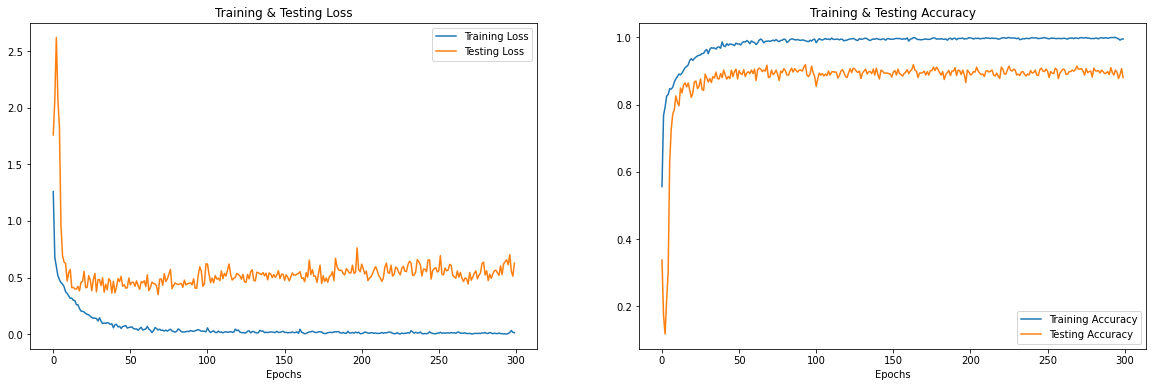

In [ ]:
epochs = [i for i in range(300)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


6/6 [==============================] - 1s 15ms/step


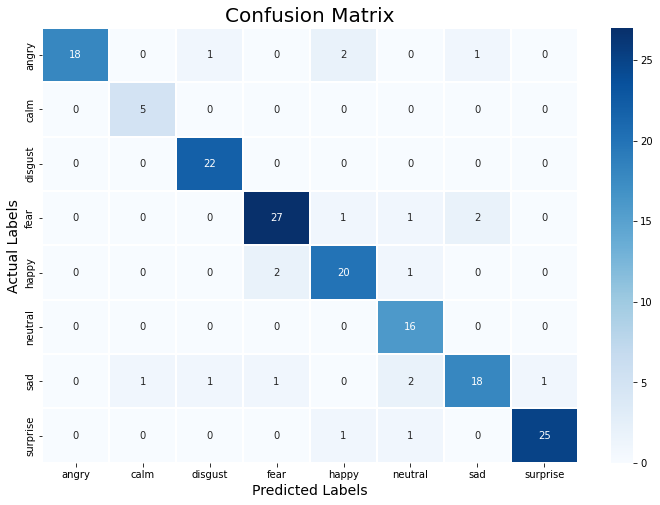

              precision    recall  f1-score   support

       angry       1.00      0.82      0.90        22
        calm       0.83      1.00      0.91         5
     disgust       0.92      1.00      0.96        22
        fear       0.90      0.87      0.89        31
       happy       0.83      0.87      0.85        23
     neutral       0.76      1.00      0.86        16
         sad       0.86      0.75      0.80        24
    surprise       0.96      0.93      0.94        27

    accuracy                           0.89       170
   macro avg       0.88      0.90      0.89       170
weighted avg       0.89      0.89      0.89       170



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))